# Exercise 4:  Exponential decay

The file [Geiger.dat](Geiger.dat) contains data from a Geiger counter used to investigate radioactive decay from an unknown source. The datafile contains the number of counts during one minute measured every hour. In this exercise you may assume that the noise or error in the count rate is a random or Poissonian process. In this case the error (standard deviation) on the number of counts $\bar{n}$ is given by the square root of the number of counts, i.e. $\bar{n} \pm \sqrt{\bar{n}}$.


In [1]:
import numpy as np

t, n = np.loadtxt('Geiger.dat', delimiter=',', skiprows=5, usecols=(0, 1), unpack=True)

print('Time (hr) \t Counts/min\n')
for i in range(len(t)):
    print('%d \t \t %d' % (t[i],n[i]))

Time (hr) 	 Counts/min

0 	 	 997
1 	 	 520
2 	 	 265
3 	 	 127
4 	 	 70
5 	 	 35
6 	 	 16
7 	 	 7
8 	 	 3


Radioactive decay is described by exponential decay given by
$$n(t) = n(0) \exp{\left(-\frac{t}{\tau}\right)}$$

### a) Ignore the error bars. Fit an exponential decay to the data to determine the time constant $\tau$. Make a plot of the result.

In [2]:
# inline plot support and settings

import matplotlib.pyplot as plt
%matplotlib inline 

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

n0  = 999.444 +/- 4.292
tau = 1.501 +/- 0.012
Value of chi square = 138.558


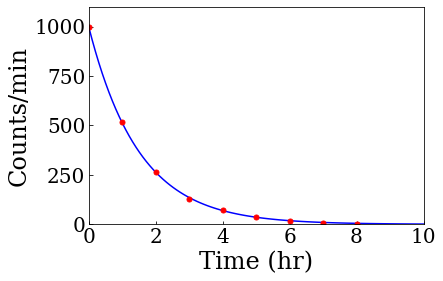

In [3]:
from scipy.optimize import curve_fit

def decay(t, n0, tau):
    "Exponential decay function"
    return (n0*np.exp(-t/tau))

popta, pcova = curve_fit(decay,t,n,p0=(1000,1))

print( "n0  = %4.3f +/- %4.3f" %(popta[0], pcova[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popta[1], pcova[1,1]**0.5))

# We will need the minimum value of chi-squared later
chisqmina = np.sum((n-decay(t,popta[0],popta[1]))**2)
print('Value of chi square = %4.3f'% chisqmina)

fine=np.linspace(0.,10,100) # Use a fine grid to get a smooth curve!
plt.plot(fine, decay(fine, *popta),  color='blue', ls='solid')

plt.plot(t,n,ls='None', marker='o',color='red', markersize=5)
plt.xlim(0,10)
plt.xlabel('Time (hr)')
plt.ylim(0,1100)
plt.ylabel('Counts/min')
plt.show()

Exponential decay is best fit on a semi-logarithmic scale. This helps to visualize if the data is truly exponential.

### b) Ignore the error bars. Fit the logarithm of the measured count rates $\ln(n(t)$ to a straight line and determine the time constant $\tau$. 

The exercise asks to make it linear by taking the log. Instead I use the built-in function to plot on semi-logarithmic axis and fit the logarithm of the data to the logarithm of the fit fucntion. This should give the same result, but the plots look better.

n0  = 1100.822 +/- 71.197
tau = 1.394 +/- 0.026
Value of chi square = 0.078


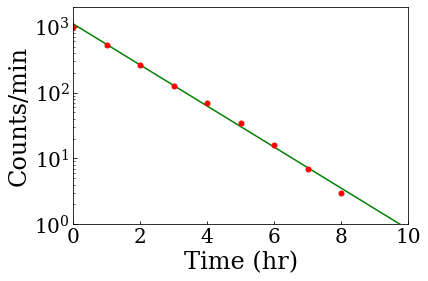

In [4]:
def logdecay(t, n0, tau):
    "Returns the height h as a function of time it takes to fall"
    return (np.log(n0*np.exp(-t/tau)))

poptb, pcovb = curve_fit(logdecay,t,np.log(n),p0=(1000,1))

print( "n0  = %4.3f +/- %4.3f" %(poptb[0], pcovb[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(poptb[1], pcovb[1,1]**0.5))

# We will need the minimum value of chi-squared later
chisqminb = np.sum((np.log(n)-logdecay(t,*poptb))**2)

print('Value of chi square = %4.3f'% chisqminb)

fine=np.linspace(0.,10,100) # Use a fine grid to get a smooth curve!
plt.semilogy(fine, decay(fine, *poptb),  color='green', ls='solid')
plt.semilogy(t,n,ls='None', marker='o',color='red', markersize=5)
plt.xlim(0,10)
plt.xlabel('Time (hr)')
plt.ylim(1,2000)
plt.ylabel('Counts/min')
plt.show()



### c) Compare the values of $\tau$ found using the two methods in a) and b). Do you find a difference? If so, explain the origin of this differnce

In [5]:
print( "Fit on linear scale with exponential decay" )
print( "==========================================" )
print( "n0  = %4.3f +/- %4.3f" %(popta[0], pcova[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popta[1], pcova[1,1]**0.5))
print('Value of chi square = %4.3f'% chisqmina)

print( "\n\nFit on logarithmic scale with straight line")
print( "==========================================" )
print( "n0  = %4.3f +/- %4.3f" %(poptb[0], pcovb[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(poptb[1], pcovb[1,1]**0.5))
print('Value of chi square = %4.3f'% chisqminb)

Fit on linear scale with exponential decay
n0  = 999.444 +/- 4.292
tau = 1.501 +/- 0.012
Value of chi square = 138.558


Fit on logarithmic scale with straight line
n0  = 1100.822 +/- 71.197
tau = 1.394 +/- 0.026
Value of chi square = 0.078


Obviously this makes a big difference. The reason for this is that we use a fit with equal weight for each point. Python sets the weight to 1 for each point and equal error on a linear scale or equal error on a logarithmic scale mean very different things. This is visualized in the graph below that compares the two fits. On a linear scale the points with small count rates become unimportant and the fit is biased towards the points with the highest count rate. Fitting a straight line on a logarithmic scale without specifying the error may put too much weight on points with a very low count rate.

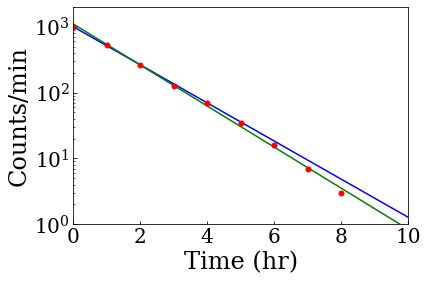

In [6]:
fine=np.linspace(0.,10,100) # Use a fine grid to get a smooth curve!
plt.semilogy(fine, decay(fine, *popta),  color='blue', ls='solid')
plt.semilogy(fine, decay(fine, *poptb),  color='green', ls='solid')
plt.semilogy(t,n,ls='None', marker='o',color='red', markersize=5)
plt.xlim(0,10)
plt.xlabel('Time (hr)')
plt.ylim(1,2000)
plt.ylabel('Counts/min')
plt.show()

### d) Calculate the error bar for each of the count rates and repeat the exponential and linear fit by taking the error bar into account in the fit. You will need to calculate the error in $ln(n)$.  Do you find the same value for $\tau$ using both ways to fit the data?

**Case 1:** Linear scale no error bar defined (exercise b)

In [7]:
popt, pcov = curve_fit(decay,t,n,p0=(1000,1))

print( "n0  = %4.3f +/- %4.3f" %(popt[0], pcov[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popt[1], pcov[1,1]**0.5))

# The value of chi-squared 
chisqmin = np.sum((n-decay(t,*popt))**2)
dof=len(n)-len(popt) # Degrees of freedom

print('Value of chi square = %4.3f with %d degrees of freedom'% (chisqmin,dof))

n0  = 999.444 +/- 4.292
tau = 1.501 +/- 0.012
Value of chi square = 138.558 with 7 degrees of freedom


**Case 2**: Linear scale with error bar (new calculation). 
Please note the factor $1/n$ in the $\chi^2$ value to account for the $\sqrt{n}$ error bars.

In [8]:
popt, pcov = curve_fit(decay,t,n,p0=(1000,1),sigma=np.sqrt(n))

print( "n0  = %4.3f +/- %4.3f" %(popt[0], pcov[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popt[1], pcov[1,1]**0.5))

# The value of chi-squared 
chisqmin = np.sum((np.log(n)-logdecay(t,*popt))**2)
dof=len(n)-len(popt) # Degrees of freedom

print('Value of chi square = %4.3f with %d degrees of freedom'% (chisqmin,dof))

n0  = 1009.572 +/- 14.222
tau = 1.467 +/- 0.018
Value of chi square = 0.183 with 7 degrees of freedom


**Case 3:** Log scale fit to straight line, but without error bars

In [9]:
popt, pcov = curve_fit(logdecay,t,np.log(n),p0=(1000,1))

print( "n0  = %4.3f +/- %4.3f" %(popt[0], pcov[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popt[1], pcov[1,1]**0.5))

# The value of chi-squared 
chisqmin = np.sum((np.log(n)-logdecay(t,*popt))**2)
dof=len(n)-len(popt) # Degrees of freedom

print('Value of chi square = %4.3f with %d degrees of freedom'% (chisqmin,dof))

n0  = 1100.822 +/- 71.197
tau = 1.394 +/- 0.026
Value of chi square = 0.078 with 7 degrees of freedom


**Case 4:** Log scale fit to straight line, with error bars. Because we are fitting the logarithm of the data we need also the error in the logarithm for this we need the simple error propagation rule. The Poissonian error in the count rate gives a variance ${\sigma_n}^2=n$.

$${\sigma_{log}}^2 = {\sigma_n}^2 \left(\frac{\partial \ln (n)}{\partial n}\right)^2 = n \left( \frac{1}{n}\right)^2 = \frac{1}{n}$$

In [10]:
popt, pcov = curve_fit(logdecay,t,np.log(n),p0=(1000,1),sigma=np.sqrt(1/n))

print( "n0  = %4.3f +/- %4.3f" %(popt[0], pcov[0,0]**0.5))
print( "tau = %4.3f +/- %4.3f" %(popt[1], pcov[1,1]**0.5))

# The value of chi-squared 
chisqmin = np.sum(n*(np.log(n)-logdecay(t,*popt))**2)
dof=len(n)-len(popt) # Degrees of freedom

print('Value of chi square = %4.3f with %d degrees of freedom'% (chisqmin,dof))

n0  = 1008.024 +/- 13.332
tau = 1.473 +/- 0.017
Value of chi square = 1.611 with 7 degrees of freedom


### e) Calculate the normalized value of $\chi^2$. What can you say about the experimental data?

The cases with the error bar taken into account give very similar results. The small differences are probably due to the fact that the conversion of error bars is only correct to first order becuase of the Taylor expansion used. 

Within the error bar the value of the fit parameters are equal, so the result is not really different. In both cases the reduced $\chi^2$ is surprisingly small. 

In the last case the reduced $\chi^2$ value is only 1.611 for 7 degrees of freedom. We would expect it to be 7. The The standard deviation of the $\chi^2$ distribution should be $\sqrt(2*DOF) = \sqrt{14} \approx 3.74$. So this is almost 2 sigma away and the probability that this is a good fit is quite small. In this case the fit goes right through the data; it is too good to be true. In this case the data are computer generated, but it could also happen if you overestimate your error bars. 

The way to find out might be to make a plot on a log scale with error bars. This is a bit tricky with the semilog scale and depends on the order of the plot commands. The error bars in the plot are even asymmetric. Note that the weight in the curve_fit are assumed to be symmetric.

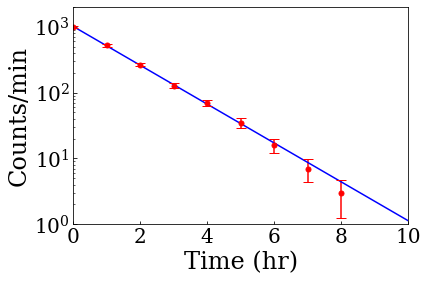

In [11]:
fine=np.linspace(0.,10,100) # Use a fine grid to get a smooth curve!
plt.semilogy(fine, decay(fine, *popt),  color='blue', ls='solid')
plt.errorbar(t,n,yerr=np.sqrt(n),ls='None', marker='o',color='red',markersize=5, capsize=5)
plt.xlim(0,10)
plt.xlabel('Time (hr)')
plt.ylim(1,2000)
plt.ylabel('Counts/min')
plt.show()